# Insurances

This notebook is about the capital of insurances. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurances=pd.read_csv('PT6_21072021205145247.csv')

In [5]:
insurances.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2001,EUR,Euro,6,Millions,NaN,NaN,10703.307,NaN,NaN
1,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2002,EUR,Euro,6,Millions,NaN,NaN,9177.693,NaN,NaN
2,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2003,EUR,Euro,6,Millions,NaN,NaN,9049.629,NaN,NaN
3,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2004,EUR,Euro,6,Millions,NaN,NaN,10025.028,NaN,NaN
4,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2005,EUR,Euro,6,Millions,NaN,NaN,11638.488,NaN,NaN


In [6]:
insurances.columns

Index(['CUR', 'Currency', 'VAR', 'Variable', 'OWN', 'Ownership', 'IVTYP',
       'Investment Type', 'ITYP', 'Insurance Type', 'DEST', 'Destination',
       'TYP', 'Insurer type', 'COU', 'Country', 'YEA', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [7]:
insurances.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,276615.000000,276615.000000,276615.0,0.0,0.0,2.741760e+05
mean,2013.424413,2013.424413,6.0,NaN,NaN,8.109024e+05
std,4.961445,4.961445,0.0,NaN,NaN,1.627506e+07
min,2001.000000,2001.000000,6.0,NaN,NaN,-1.030099e+05
25%,2010.000000,2010.000000,6.0,NaN,NaN,4.000000e+00
50%,2015.000000,2015.000000,6.0,NaN,NaN,3.865305e+02
75%,2017.000000,2017.000000,6.0,NaN,NaN,7.480068e+03
max,2019.000000,2019.000000,6.0,NaN,NaN,2.230522e+09


In [8]:
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276615 entries, 0 to 276614
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CUR                    276615 non-null  object 
 1   Currency               276615 non-null  object 
 2   VAR                    276615 non-null  object 
 3   Variable               276615 non-null  object 
 4   OWN                    276615 non-null  object 
 5   Ownership              276615 non-null  object 
 6   IVTYP                  276615 non-null  object 
 7   Investment Type        276615 non-null  object 
 8   ITYP                   276615 non-null  object 
 9   Insurance Type         276615 non-null  object 
 10  DEST                   276615 non-null  object 
 11  Destination            276615 non-null  object 
 12  TYP                    276615 non-null  object 
 13  Insurer type           276615 non-null  object 
 14  COU                    276615 non-nu

In [17]:
grouped_german=insurances[insurances['Country']=='Germany'].groupby(['Year', 'Investment Type'], as_index=False).sum()

In [42]:
grouped_german.index

RangeIndex(start=0, stop=151, step=1)

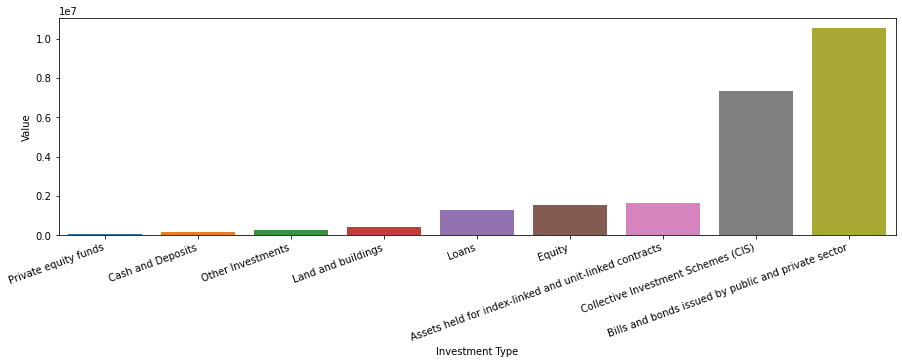

In [41]:
investment_year=grouped_german['Year']==2018
investment_type=grouped_german['Investment Type']!='TOTAL INVESTMENTS'
of_which=grouped_german['Investment Type'].str.contains("of which")
chart_data=grouped_german[investment_year & investment_type & ~of_which]

chart_data = chart_data.sort_values(['Value']).reset_index(drop=True)

plt.figure(figsize=(15,4))
ax=sns.barplot(x='Investment Type', y='Value', data=chart_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()